# ***MOVIE RECOMMDATION SYSTEM--farhan ***

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
cols = 'user_id item_id rating timestamp'.split()

In [5]:
df = pd.read_csv('u.data',sep='\t',names=cols)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
df['user_id'].nunique()

944

In [7]:
df.sample(5)

,user_id,item_id,rating,timestamp
23102,453,568,3,888207161
62636,865,169,5,880235059
15520,130,255,4,874953794
90190,840,89,5,891204418
61053,868,1,4,877103320


In [8]:
cols_movies = ['item_id', 'title']+[str(i) for i in range(22)]
movie_titles = pd.read_csv('u.item', sep='|', names = cols_movies, encoding='latin-1')
movie_titles.head()


,item_id,title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [9]:
movie_titles = movie_titles[['item_id','title']]
movie_titles.sample(5)

,item_id,title
864,865,"Ice Storm, The (1997)"
1416,1417,"Turning, The (1992)"
1286,1287,Ed (1996)
88,89,Blade Runner (1982)
508,509,My Left Foot (1989)


In [10]:
movie_titles.shape

(1682, 2)

In [11]:
df.shape

(100003, 4)

In [12]:
 data= pd.merge(df,movie_titles, on='item_id')
data.sample(10)

,user_id,item_id,rating,timestamp,title
17457,234,496,4,892079190,It's a Wonderful Life (1946)
40855,448,271,4,891888509,Starship Troopers (1997)
67635,887,393,4,881381114,Mrs. Doubtfire (1993)
50653,519,350,5,883250102,Fallen (1998)
24082,671,273,4,875389187,Heat (1995)
31187,109,944,3,880579107,Renaissance Man (1994)
88901,588,728,3,890027707,Junior (1994)
91170,349,1117,3,879466366,Surviving Picasso (1996)
7956,788,241,5,880869075,"Last of the Mohicans, The (1992)"
95029,181,1362,1,878962200,American Strays (1996)


***Exploratory Data Analysis (EDA)***

In [13]:
data['title'].value_counts().head(20)

Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [14]:
data['title'].value_counts().tail(20)

Wife, The (1995)                                   1
Angela (1995)                                      1
Nobody Loves Me (Keiner liebt mich) (1994)         1
Symphonie pastorale, La (1946)                     1
Vie est belle, La (Life is Rosey) (1987)           1
He Walked by Night (1948)                          1
Touki Bouki (Journey of the Hyena) (1973)          1
Low Life, The (1994)                               1
JLG/JLG - autoportrait de décembre (1994)          1
Girl in the Cadillac (1995)                        1
Etz Hadomim Tafus (Under the Domin Tree) (1994)    1
Hostile Intentions (1994)                          1
Bird of Prey (1996)                                1
Baton Rouge (1988)                                 1
Johns (1996)                                       1
Promise, The (Versprechen, Das) (1994)             1
Crude Oasis, The (1995)                            1
New Age, The (1994)                                1
Next Step, The (1995)                         

In [15]:
df['rating'].mean()

3.5298641040768777

In [16]:
for i in data['title'].unique():
    print(i, data['rating'][data['title']==i].mean(), sep='\t\t')

Star Wars (1977)		4.359589041095891
Empire Strikes Back, The (1980)		4.206521739130435
Gone with the Wind (1939)		3.854651162790698
Kolya (1996)		3.9914529914529915
L.A. Confidential (1997)		4.161616161616162
Heavyweights (1994)		2.1538461538461537
Legends of the Fall (1994)		3.45679012345679
Jackie Brown (1997)		3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)		4.252577319587629
Hunt for Red October, The (1990)		3.8634361233480177
Jungle Book, The (1994)		3.5647058823529414
Grease (1978)		3.347058823529412
Remains of the Day, The (1993)		3.94
Men in Black (1997)		3.745874587458746
Romy and Michele's High School Reunion (1997)		3.061224489795918
Star Trek: First Contact (1996)		3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995)		2.8947368421052633
Batman Forever (1995)		2.6666666666666665
Only You (1994)		3.1538461538461537
Age of Innocence, The (1993)		3.3846153846153846
Sabrina (1995)		3.5
Just Cause (1995)		3.1428571

In [17]:
# Groupby
data.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [18]:
rating = pd.DataFrame(data.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
rating['count'] = data['title'].value_counts()
rating.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [20]:
sum(rating['count']<10)

520

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

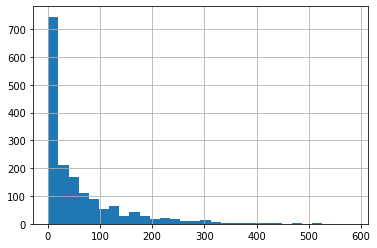

In [22]:
rating['count'].hist(bins=30)

In [23]:
pivot_df = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
pivot_df.head(20)


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3

In [24]:
rating.sort_values('count', ascending = False).head(20)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [27]:
sw_ratings = pivot_df['Empire Strikes Back, The (1980)']
sw_ratings

user_id
0      5.0
1      5.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Empire Strikes Back, The (1980), Length: 944, dtype: float64

In [28]:
pivot_df['1-900 (1994)'].mean()

2.6

In [30]:
similarity_sw = pivot_df.corrwith(sw_ratings)
similarity_sw

title
'Til There Was You (1997)                0.500000
1-900 (1994)                            -0.944911
101 Dalmatians (1996)                    0.025744
12 Angry Men (1957)                      0.113501
187 (1997)                               0.317744
                                           ...   
Young Guns II (1990)                     0.423689
Young Poisoner's Handbook, The (1995)    0.060931
Zeus and Roxanne (1997)                       NaN
unknown                                  0.884652
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [31]:
corr_df = pd.DataFrame(similarity_sw, columns = ['Correlation'])
corr_df.dropna(inplace=True)
corr_df.sort_values('Correlation')

,Correlation
title,
Dangerous Ground (1997),-1.0
Love and Death on Long Island (1997),-1.0
Theodore Rex (1995),-1.0
The Innocent (1994),-1.0
Frisk (1995),-1.0
...,...
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Empire Strikes Back, The (1980)",1.0
Carpool (1996),1.0


In [32]:
corr_df = corr_df.join(rating['count'])
corr_df.head()

,Correlation,count
title,,
'Til There Was You (1997),0.500000,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.025744,109
12 Angry Men (1957),0.113501,125
187 (1997),0.317744,41


In [33]:
corr_df[corr_df['count']>200].sort_values(by='Correlation',ascending=False).head(30)

,Correlation,count
title,,
"Empire Strikes Back, The (1980)",1.000000,368
Star Wars (1977),0.748353,584
Return of the Jedi (1983),0.721229,507
Raiders of the Lost Ark (1981),0.538659,420
Back to the Future (1985),0.345285,350
Terminator 2: Judgment Day (1991),0.333532,295
Field of Dreams (1989),0.328415,212
Chasing Amy (1997),0.326788,379
Indiana Jones and the Last Crusade (1989),0.313236,331


In [34]:
ter_ratings = pivot_df['Terminator 2: Judgment Day (1991)']
similarity_ter = pivot_df.corrwith(ter_ratings)
corr_df_ter = pd.DataFrame(similarity_ter, columns = ['Correlation'])
corr_df_ter.dropna(inplace=True)
corr_df_ter = corr_df_ter.join(rating['count'])
corr_df_ter[corr_df_ter['count']>200].sort_values(by='Correlation',ascending=False).head(3)

,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
True Lies (1994),0.516728,208


In [35]:
corr_df_ter[(corr_df_ter['count']>200)&(corr_df_ter['Correlation']>0.55)].sort_values(by='Correlation',ascending=False)

,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
